# Data Cleaning, NLP and sentiment labels

In this notebook we want to clean the raw tweets, understand the text data a bit better and assign sentiment labels using known open source classification models.

In [1]:
import pandas as pd
from contractions import *
import re
import os
from nltk.stem import WordNetLemmatizer
import nltk
import spacy
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', None)

## Loading the data

This is the raw data we scraped in the first notebook.

In [2]:
df = pd.read_csv('twitter_scrape.csv')

And this is how the raw data looks like. We have some work to do!!

In [3]:
df

,TimeStamps,Screen name,Username,Tweets
0,2022-02-25 05:11:24+00:00,BiovoiceNews,BioVoice News,BIO-BUSINESS: Zydus Group announced its new brand identity with the listed entity of the group Cadila Healthcare Limited to be now known as #ZydusLifesciences Limited.\n\nMore: https://t.co/qAqZQbhRqT via #6yearsofBioVoiceNews @ZydusUniverse #zydus #pharma #biopharma #vaccine
1,2022-02-25 05:08:18+00:00,3rdworldnetwork,Third World Network,"#WTO: Dangers of ""take-it-or-leave-it"" compromise outcome on #TRIPSwaiver \nSouth Africa expressed concern that the delay in approving a TRIPS waiver is hampering efforts to diversify proper production of vaccines &amp; address ""#vaccine inequity.\n\n#covid19\n\n➡️https://t.co/eIxVzoo78L https://t.co/Mf8YXC15jF"
2,2022-02-25 05:06:03+00:00,NST_Online,New Straits Times,"#NSTnation State Health director Dr Othman Warijo said the case involved a 10-year-old girl with a history of asthma, who received her vaccine at the Sultanah Bahiyah Hospital.\n\n#Kedah #Children #Vaccine #Covid19 #PICKids \n\nhttps://t.co/Rg2WTa1sIQ"
3,2022-02-25 05:00:00+00:00,ppe_china,ChinaPPE,Non-Medical Face Mask KN95\nProtect you from non-oily airborne pollutants\n\n#immunity #vaccine #TestKit #glove #3plymask #ff2 #KN95 https://t.co/IdVuPqS1li
4,2022-02-25 04:59:49+00:00,Dog8Bone,Cryptogarb,https://t.co/4ySms7FGHF ForSale\n#Vaccine #COVID19 #Covid #Medical #Life #Domains #Technology #Tech #Science #medicine #Doctor #100DaysOfCode #Bot #Memes #BigData #Security #Cloud #javascript #java #datascience #MachineLearning #web3 #NFT #VC #Investor #socialmedia #branding #ai https://t.co/pXaSo88a1o
...,...,...,...,...
2088,2022-02-21 14:15:00+00:00,afloenews,AFLOE News Network,"With no public announcements, the Food and Drug Administration (FDA) and National Institutes of Health (NIH) both are studying neurological problems that have appeared in people after receiving the Covid vaccines.\n\nDo you think the covid shot is safe? 🤔\n\n#fda #cdc #vaccine https://t.co/niO1Pu4JEm"
2089,2022-02-21 14:14:41+00:00,Akusomcpeith,Felix🕯,"@UN You could've had it had U stood up to #BigPharma &amp; #NuclearBigBrother; so insisted on a #Vaccine for the #Planet- not for #BigBusiness!\n\nFor by it, you've all turned #COVID19 into a biological #weapon of mass destruction by your #action.\nThis U know too well.~Felix\n#Akusomcpeith"
2090,2022-02-21 14:12:45+00:00,StephanosTesfu,Tesfu Stephanos,Wow! It has been a year already since your inauguration and so much accomplished. Thank you for bringing #USA to the forefront. #Vaccine #Climate #TheGreatLakes #CleanWater #GlobalStability #JobsForAmerica#SummitForDemocracy #GlobalYiakl@JoeBiden @POTUS @VP
2091,2022-02-21 14:10:47+00:00,TheQuint,The Quint,"After Bharat Biotech's #Covaxin, Biological E Limited's #Corbevax has become only the second #vaccine to receive emergency use authorization by the DCGI.\nhttps://t.co/ru99gHFOHJ"


# NLP (Natural Language Processing)

## Tweets cleaning

We first create two functions that will take a sentence and will correct/clean the text in order to standardize it.

Comment below show what each line of code does in the cleaning process.

In [4]:
def decontracted(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

def sentence_cleaning(sentence):
    # Get rid of re-tweet
    if ': ' in sentence:
        sentence = sentence.split(': ')[1]
    # Substitute of apex quote with quote
    sentence = sentence.replace('’', '\'')
    # Remove usernames mentioned with @
    sentence = re.sub(r'(@)[^\s]+', '', sentence)
    # Get rid of web-site
    sentence = re.sub(r'(?:www|https?)[^\s]+', '', sentence)
    # Run decontraction
    sentence = decontracted(sentence.lower().strip())
    # Correct spelling of verbs ending with 'in'
    sentence = re.sub(r"in(')", "ing", sentence)
    # Get rid of double puntuation
    sentence = re.sub(r"([.!?]+)\1", r"\1", sentence)
    # Space punctiations from words for splitting
    sentence = re.sub('([.,!?()])', r' \1 ', sentence)
    # Get rid of multiple spaces
    sentence = re.sub('\s{2,}', ' ', sentence)
    # Get rid of non-letter character
    sentence = re.sub(r"[^a-zA-Z']+", r" ", sentence)
    return sentence

In [5]:
# Apply the function to the Tweet column
df['Tweets_corrected'] = df['Tweets'].apply(lambda x: sentence_cleaning(x))

Tweets now look a little bit better.

In [6]:
df

,TimeStamps,Screen name,Username,Tweets,Tweets_corrected
0,2022-02-25 05:11:24+00:00,BiovoiceNews,BioVoice News,BIO-BUSINESS: Zydus Group announced its new brand identity with the listed entity of the group Cadila Healthcare Limited to be now known as #ZydusLifesciences Limited.\n\nMore: https://t.co/qAqZQbhRqT via #6yearsofBioVoiceNews @ZydusUniverse #zydus #pharma #biopharma #vaccine,zydus group announced its new brand identity with the listed entity of the group cadila healthcare limited to be now known as zyduslifesciences limited more
1,2022-02-25 05:08:18+00:00,3rdworldnetwork,Third World Network,"#WTO: Dangers of ""take-it-or-leave-it"" compromise outcome on #TRIPSwaiver \nSouth Africa expressed concern that the delay in approving a TRIPS waiver is hampering efforts to diversify proper production of vaccines &amp; address ""#vaccine inequity.\n\n#covid19\n\n➡️https://t.co/eIxVzoo78L https://t.co/Mf8YXC15jF",dangers of take it or leave it compromise outcome on tripswaiver south africa expressed concern that the delay in approving a trips waiver is hampering efforts to diversify proper production of vaccines amp address vaccine inequity covid
2,2022-02-25 05:06:03+00:00,NST_Online,New Straits Times,"#NSTnation State Health director Dr Othman Warijo said the case involved a 10-year-old girl with a history of asthma, who received her vaccine at the Sultanah Bahiyah Hospital.\n\n#Kedah #Children #Vaccine #Covid19 #PICKids \n\nhttps://t.co/Rg2WTa1sIQ",nstnation state health director dr othman warijo said the case involved a year old girl with a history of asthma who received her vaccine at the sultanah bahiyah hospital kedah children vaccine covid pickids
3,2022-02-25 05:00:00+00:00,ppe_china,ChinaPPE,Non-Medical Face Mask KN95\nProtect you from non-oily airborne pollutants\n\n#immunity #vaccine #TestKit #glove #3plymask #ff2 #KN95 https://t.co/IdVuPqS1li,non medical face mask kn protect you from non oily airborne pollutants immunity vaccine testkit glove plymask ff kn
4,2022-02-25 04:59:49+00:00,Dog8Bone,Cryptogarb,https://t.co/4ySms7FGHF ForSale\n#Vaccine #COVID19 #Covid #Medical #Life #Domains #Technology #Tech #Science #medicine #Doctor #100DaysOfCode #Bot #Memes #BigData #Security #Cloud #javascript #java #datascience #MachineLearning #web3 #NFT #VC #Investor #socialmedia #branding #ai https://t.co/pXaSo88a1o,forsale vaccine covid covid medical life domains technology tech science medicine doctor daysofcode bot memes bigdata security cloud javascript java datascience machinelearning web nft vc investor socialmedia branding ai
...,...,...,...,...,...
2088,2022-02-21 14:15:00+00:00,afloenews,AFLOE News Network,"With no public announcements, the Food and Drug Administration (FDA) and National Institutes of Health (NIH) both are studying neurological problems that have appeared in people after receiving the Covid vaccines.\n\nDo you think the covid shot is safe? 🤔\n\n#fda #cdc #vaccine https://t.co/niO1Pu4JEm",with no public announcements the food and drug administration fda and national institutes of health nih both are studying neurological problems that have appeared in people after receiving the covid vaccines do you think the covid shot is safe fda cdc vaccine
2089,2022-02-21 14:14:41+00:00,Akusomcpeith,Felix🕯,"@UN You could've had it had U stood up to #BigPharma &amp; #NuclearBigBrother; so insisted on a #Vaccine for the #Planet- not for #BigBusiness!\n\nFor by it, you've all turned #COVID19 into a biological #weapon of mass destruction by your #action.\nThis U know too well.~Felix\n#Akusomcpeith",you could have had it had u stood up to bigpharma amp nuclearbigbrother so insisted on a vaccine for the planet not for bigbusiness for by it you have all turned covid into a biological weapon of mass destruction by your action this u know too well felix akusomcpeith
2090,2022-02-21 14:12:45+00:00,StephanosTesfu,Tesfu Stephanos,Wow! It has been a year already since your inauguration and so much accomplished. Thank you for bri

## Lemmatization

Next step is to lemmatize the text. For this purpose we can use:

- nltk (wordnet)
- spacy

Below are some considerations in the use of nltk and why I chose to go with spacy.

In [7]:
#nltk.download('wordnet')

We can choose to use spacy or nltk lemmatizer. Spacy seems to work better then nltk.

With nltk:

has --> ha

pass --> pas

doses --> dos



In [8]:
# To use nltk change this to False
use_spacy = True

In [9]:
if use_spacy:
    os.environ['LANGUAGE_MODEL_SPACY'] = "en_core_web_sm"
    lemmatizer = spacy.load(os.environ['LANGUAGE_MODEL_SPACY'])
    df['lemmatized_tweets'] = df['Tweets_corrected'].apply(lambda row: ' '.join([x.lemma_ for x in lemmatizer(row)]))
else:
    lemmatizer = WordNetLemmatizer()
    df['lemmatized_tweets'] = df['Tweets_corrected'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x) for x in row.split()]))

In [10]:
df

,TimeStamps,Screen name,Username,Tweets,Tweets_corrected,lemmatized_tweets
0,2022-02-25 05:11:24+00:00,BiovoiceNews,BioVoice News,BIO-BUSINESS: Zydus Group announced its new brand identity with the listed entity of the group Cadila Healthcare Limited to be now known as #ZydusLifesciences Limited.\n\nMore: https://t.co/qAqZQbhRqT via #6yearsofBioVoiceNews @ZydusUniverse #zydus #pharma #biopharma #vaccine,zydus group announced its new brand identity with the listed entity of the group cadila healthcare limited to be now known as zyduslifesciences limited more,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more
1,2022-02-25 05:08:18+00:00,3rdworldnetwork,Third World Network,"#WTO: Dangers of ""take-it-or-leave-it"" compromise outcome on #TRIPSwaiver \nSouth Africa expressed concern that the delay in approving a TRIPS waiver is hampering efforts to diversify proper production of vaccines &amp; address ""#vaccine inequity.\n\n#covid19\n\n➡️https://t.co/eIxVzoo78L https://t.co/Mf8YXC15jF",dangers of take it or leave it compromise outcome on tripswaiver south africa expressed concern that the delay in approving a trips waiver is hampering efforts to diversify proper production of vaccines amp address vaccine inequity covid,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid
2,2022-02-25 05:06:03+00:00,NST_Online,New Straits Times,"#NSTnation State Health director Dr Othman Warijo said the case involved a 10-year-old girl with a history of asthma, who received her vaccine at the Sultanah Bahiyah Hospital.\n\n#Kedah #Children #Vaccine #Covid19 #PICKids \n\nhttps://t.co/Rg2WTa1sIQ",nstnation state health director dr othman warijo said the case involved a year old girl with a history of asthma who received her vaccine at the sultanah bahiyah hospital kedah children vaccine covid pickids,nstnation state health director dr othman warijo say the case involve a year old girl with a history of asthma who receive her vaccine at the sultanah bahiyah hospital kedah child vaccine covid pickid
3,2022-02-25 05:00:00+00:00,ppe_china,ChinaPPE,Non-Medical Face Mask KN95\nProtect you from non-oily airborne pollutants\n\n#immunity #vaccine #TestKit #glove #3plymask #ff2 #KN95 https://t.co/IdVuPqS1li,non medical face mask kn protect you from non oily airborne pollutants immunity vaccine testkit glove plymask ff kn,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn
4,2022-02-25 04:59:49+00:00,Dog8Bone,Cryptogarb,https://t.co/4ySms7FGHF ForSale\n#Vaccine #COVID19 #Covid #Medical #Life #Domains #Technology #Tech #Science #medicine #Doctor #100DaysOfCode #Bot #Memes #BigData #Security #Cloud #javascript #java #datascience #MachineLearning #web3 #NFT #VC #Investor #socialmedia #branding #ai https://t.co/pXaSo88a1o,forsale vaccine covid covid medical life domains technology tech science medicine doctor daysofcode bot memes bigdata security cloud javascript java datascience machinelearning web nft vc investor socialmedia branding ai,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai
...,...,...,...,...,...,...
2088,2022-02-21 14:15:00+00:00,afloenews,AFLOE News Network,"With no public announcements, the Food and Drug Administration (FDA) and National Institutes of Health (NIH) both are studying neurological problems that have appeared in people after receiving the Covid vaccines.\n\nDo you think the covid shot is safe? 🤔\n\n#fda #cdc #vaccine https://t.co/niO1Pu4JEm",with no public announcements the food and drug administration fda and national institutes of health nih 

We want now to label the tweets based on their sentiment. We are going to use known open source tools:

- VADER
- TextBlob

We are going to label them into *positive*, *negative* or *neutral* and we are going to assign them based on the score these models return.

## VADER sentiment analysis

Here is the [link](https://pypi.org/project/vaderSentiment/) where to download VADER.

In [11]:
analyzer = SentimentIntensityAnalyzer()
df['VADER_compound'] = df['lemmatized_tweets'].apply(lambda row: analyzer.polarity_scores(row)['compound'])

This is the threshold for VADER scores

In [12]:
def assign_sentiment(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [13]:
df['VADER_sentiment'] = df['VADER_compound'].apply(assign_sentiment)

In [14]:
df

,TimeStamps,Screen name,Username,Tweets,Tweets_corrected,lemmatized_tweets,VADER_compound,VADER_sentiment
0,2022-02-25 05:11:24+00:00,BiovoiceNews,BioVoice News,BIO-BUSINESS: Zydus Group announced its new brand identity with the listed entity of the group Cadila Healthcare Limited to be now known as #ZydusLifesciences Limited.\n\nMore: https://t.co/qAqZQbhRqT via #6yearsofBioVoiceNews @ZydusUniverse #zydus #pharma #biopharma #vaccine,zydus group announced its new brand identity with the listed entity of the group cadila healthcare limited to be now known as zyduslifesciences limited more,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more,0.0000,Neutral
1,2022-02-25 05:08:18+00:00,3rdworldnetwork,Third World Network,"#WTO: Dangers of ""take-it-or-leave-it"" compromise outcome on #TRIPSwaiver \nSouth Africa expressed concern that the delay in approving a TRIPS waiver is hampering efforts to diversify proper production of vaccines &amp; address ""#vaccine inequity.\n\n#covid19\n\n➡️https://t.co/eIxVzoo78L https://t.co/Mf8YXC15jF",dangers of take it or leave it compromise outcome on tripswaiver south africa expressed concern that the delay in approving a trips waiver is hampering efforts to diversify proper production of vaccines amp address vaccine inequity covid,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid,-0.7096,Negative
2,2022-02-25 05:06:03+00:00,NST_Online,New Straits Times,"#NSTnation State Health director Dr Othman Warijo said the case involved a 10-year-old girl with a history of asthma, who received her vaccine at the Sultanah Bahiyah Hospital.\n\n#Kedah #Children #Vaccine #Covid19 #PICKids \n\nhttps://t.co/Rg2WTa1sIQ",nstnation state health director dr othman warijo said the case involved a year old girl with a history of asthma who received her vaccine at the sultanah bahiyah hospital kedah children vaccine covid pickids,nstnation state health director dr othman warijo say the case involve a year old girl with a history of asthma who receive her vaccine at the sultanah bahiyah hospital kedah child vaccine covid pickid,0.0000,Neutral
3,2022-02-25 05:00:00+00:00,ppe_china,ChinaPPE,Non-Medical Face Mask KN95\nProtect you from non-oily airborne pollutants\n\n#immunity #vaccine #TestKit #glove #3plymask #ff2 #KN95 https://t.co/IdVuPqS1li,non medical face mask kn protect you from non oily airborne pollutants immunity vaccine testkit glove plymask ff kn,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn,0.6597,Positive
4,2022-02-25 04:59:49+00:00,Dog8Bone,Cryptogarb,https://t.co/4ySms7FGHF ForSale\n#Vaccine #COVID19 #Covid #Medical #Life #Domains #Technology #Tech #Science #medicine #Doctor #100DaysOfCode #Bot #Memes #BigData #Security #Cloud #javascript #java #datascience #MachineLearning #web3 #NFT #VC #Investor #socialmedia #branding #ai https://t.co/pXaSo88a1o,forsale vaccine covid covid medical life domains technology tech science medicine doctor daysofcode bot memes bigdata security cloud javascript java datascience machinelearning web nft vc investor socialmedia branding ai,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai,0.3400,Positive
...,...,...,...,...,...,...,...,...
2088,2022-02-21 14:15:00+00:00,afloenews,AFLOE News Network,"With no public announcements, the Food and Drug Administration (FDA) and National Institutes of Health (NIH) both are studying neurological problems that have appeared in people after receiving the Covid vaccines.\n\nDo you think the covid shot is safe? 🤔\n\n#fda #cdc #vaccine https://t.c

## TextBlob

Here is the [link](https://textblob.readthedocs.io/en/dev/install.html) where to download TextBlob.

The same thing we are going to do for TextBLob.

In [15]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.1:
        return 'Negative'
    elif polarity > 0.1:
        return 'Positive'
    else:
        return 'Neutral'
    

In [16]:
def textblob_polarity(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity

In [17]:
df['TextBlob_sentiment'] = df['lemmatized_tweets'].apply(textblob_sentiment)

In [18]:
df['TextBlob_polarity'] = df['lemmatized_tweets'].apply(textblob_polarity)

In [19]:
df

,TimeStamps,Screen name,Username,Tweets,Tweets_corrected,lemmatized_tweets,VADER_compound,VADER_sentiment,TextBlob_sentiment,TextBlob_polarity
0,2022-02-25 05:11:24+00:00,BiovoiceNews,BioVoice News,BIO-BUSINESS: Zydus Group announced its new brand identity with the listed entity of the group Cadila Healthcare Limited to be now known as #ZydusLifesciences Limited.\n\nMore: https://t.co/qAqZQbhRqT via #6yearsofBioVoiceNews @ZydusUniverse #zydus #pharma #biopharma #vaccine,zydus group announced its new brand identity with the listed entity of the group cadila healthcare limited to be now known as zyduslifesciences limited more,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more,0.0000,Neutral,Positive,0.318182
1,2022-02-25 05:08:18+00:00,3rdworldnetwork,Third World Network,"#WTO: Dangers of ""take-it-or-leave-it"" compromise outcome on #TRIPSwaiver \nSouth Africa expressed concern that the delay in approving a TRIPS waiver is hampering efforts to diversify proper production of vaccines &amp; address ""#vaccine inequity.\n\n#covid19\n\n➡️https://t.co/eIxVzoo78L https://t.co/Mf8YXC15jF",dangers of take it or leave it compromise outcome on tripswaiver south africa expressed concern that the delay in approving a trips waiver is hampering efforts to diversify proper production of vaccines amp address vaccine inequity covid,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid,-0.7096,Negative,Neutral,0.000000
2,2022-02-25 05:06:03+00:00,NST_Online,New Straits Times,"#NSTnation State Health director Dr Othman Warijo said the case involved a 10-year-old girl with a history of asthma, who received her vaccine at the Sultanah Bahiyah Hospital.\n\n#Kedah #Children #Vaccine #Covid19 #PICKids \n\nhttps://t.co/Rg2WTa1sIQ",nstnation state health director dr othman warijo said the case involved a year old girl with a history of asthma who received her vaccine at the sultanah bahiyah hospital kedah children vaccine covid pickids,nstnation state health director dr othman warijo say the case involve a year old girl with a history of asthma who receive her vaccine at the sultanah bahiyah hospital kedah child vaccine covid pickid,0.0000,Neutral,Neutral,0.100000
3,2022-02-25 05:00:00+00:00,ppe_china,ChinaPPE,Non-Medical Face Mask KN95\nProtect you from non-oily airborne pollutants\n\n#immunity #vaccine #TestKit #glove #3plymask #ff2 #KN95 https://t.co/IdVuPqS1li,non medical face mask kn protect you from non oily airborne pollutants immunity vaccine testkit glove plymask ff kn,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn,0.6597,Positive,Neutral,0.000000
4,2022-02-25 04:59:49+00:00,Dog8Bone,Cryptogarb,https://t.co/4ySms7FGHF ForSale\n#Vaccine #COVID19 #Covid #Medical #Life #Domains #Technology #Tech #Science #medicine #Doctor #100DaysOfCode #Bot #Memes #BigData #Security #Cloud #javascript #java #datascience #MachineLearning #web3 #NFT #VC #Investor #socialmedia #branding #ai https://t.co/pXaSo88a1o,forsale vaccine covid covid medical life domains technology tech science medicine doctor daysofcode bot memes bigdata security cloud javascript java datascience machinelearning web nft vc investor socialmedia branding ai,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai,0.3400,Positive,Neutral,0.000000
...,...,...,...,...,...,...,...,...,...,...
2088,2022-02-21 14:15:00+00:00,afloenews,AFLOE News Network,"With no public announcements, the Food and Drug Administration (FDA) and National Institutes of Health (NIH) both are studying neurological problems that have

## Comparing the results

Let's how many tweets are different classified by the 2 models.

In [20]:
df[df['VADER_sentiment'] != df['TextBlob_sentiment']].shape

(973, 10)

And have a look at them.

In [21]:
df[df['VADER_sentiment'] != df['TextBlob_sentiment']].head(50)

,TimeStamps,Screen name,Username,Tweets,Tweets_corrected,lemmatized_tweets,VADER_compound,VADER_sentiment,TextBlob_sentiment,TextBlob_polarity
0,2022-02-25 05:11:24+00:00,BiovoiceNews,BioVoice News,BIO-BUSINESS: Zydus Group announced its new brand identity with the listed entity of the group Cadila Healthcare Limited to be now known as #ZydusLifesciences Limited.\n\nMore: https://t.co/qAqZQbhRqT via #6yearsofBioVoiceNews @ZydusUniverse #zydus #pharma #biopharma #vaccine,zydus group announced its new brand identity with the listed entity of the group cadila healthcare limited to be now known as zyduslifesciences limited more,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more,0.0000,Neutral,Positive,3.181818e-01
1,2022-02-25 05:08:18+00:00,3rdworldnetwork,Third World Network,"#WTO: Dangers of ""take-it-or-leave-it"" compromise outcome on #TRIPSwaiver \nSouth Africa expressed concern that the delay in approving a TRIPS waiver is hampering efforts to diversify proper production of vaccines &amp; address ""#vaccine inequity.\n\n#covid19\n\n➡️https://t.co/eIxVzoo78L https://t.co/Mf8YXC15jF",dangers of take it or leave it compromise outcome on tripswaiver south africa expressed concern that the delay in approving a trips waiver is hampering efforts to diversify proper production of vaccines amp address vaccine inequity covid,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid,-0.7096,Negative,Neutral,0.000000e+00
3,2022-02-25 05:00:00+00:00,ppe_china,ChinaPPE,Non-Medical Face Mask KN95\nProtect you from non-oily airborne pollutants\n\n#immunity #vaccine #TestKit #glove #3plymask #ff2 #KN95 https://t.co/IdVuPqS1li,non medical face mask kn protect you from non oily airborne pollutants immunity vaccine testkit glove plymask ff kn,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn,0.6597,Positive,Neutral,0.000000e+00
4,2022-02-25 04:59:49+00:00,Dog8Bone,Cryptogarb,https://t.co/4ySms7FGHF ForSale\n#Vaccine #COVID19 #Covid #Medical #Life #Domains #Technology #Tech #Science #medicine #Doctor #100DaysOfCode #Bot #Memes #BigData #Security #Cloud #javascript #java #datascience #MachineLearning #web3 #NFT #VC #Investor #socialmedia #branding #ai https://t.co/pXaSo88a1o,forsale vaccine covid covid medical life domains technology tech science medicine doctor daysofcode bot memes bigdata security cloud javascript java datascience machinelearning web nft vc investor socialmedia branding ai,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai,0.3400,Positive,Neutral,0.000000e+00
6,2022-02-25 04:49:47+00:00,PrakashJavdekar,Prakash Javadekar,Another achievement in India’s fight against COVID-19!\nCORBEVAX the #MakeinIndia #vaccine has been approved for emergency use for children in the age group of 12-18 years.\n\n #IndiaFightsCorona \n@PMOIndia @BJP4India \n@JPNadda @AmitShah \n@MoHFW_INDIA @mansukhmandviya https://t.co/8FAcu5UgLt,another achievement in india's fight against covid corbevax the makeinindia vaccine has been approved for emergency use for children in the age group of years indiafightscorona,another achievement in india 's fight against covid corbevax the makeinindia vaccine have be approve for emergency use for child in the age group of year indiafightscorona,-0.6369,Negative,Neutral,0.000000e+00
7,2022-02-25 04:43:54+00:00,palmboy4444,Rosa Parks ❤🏳️‍🌈💉💉💉,"#Australia #epidemiologist warns it's too early to unwind #Covid19 #health measures\n\nKeep Wearing #masks, #distance + get #booster #vaccine\n\n#Covid19Aus #Covid19Au #mask #vaccines #vaccinat

We can also plot the distributions given by the 2 models to compare them.

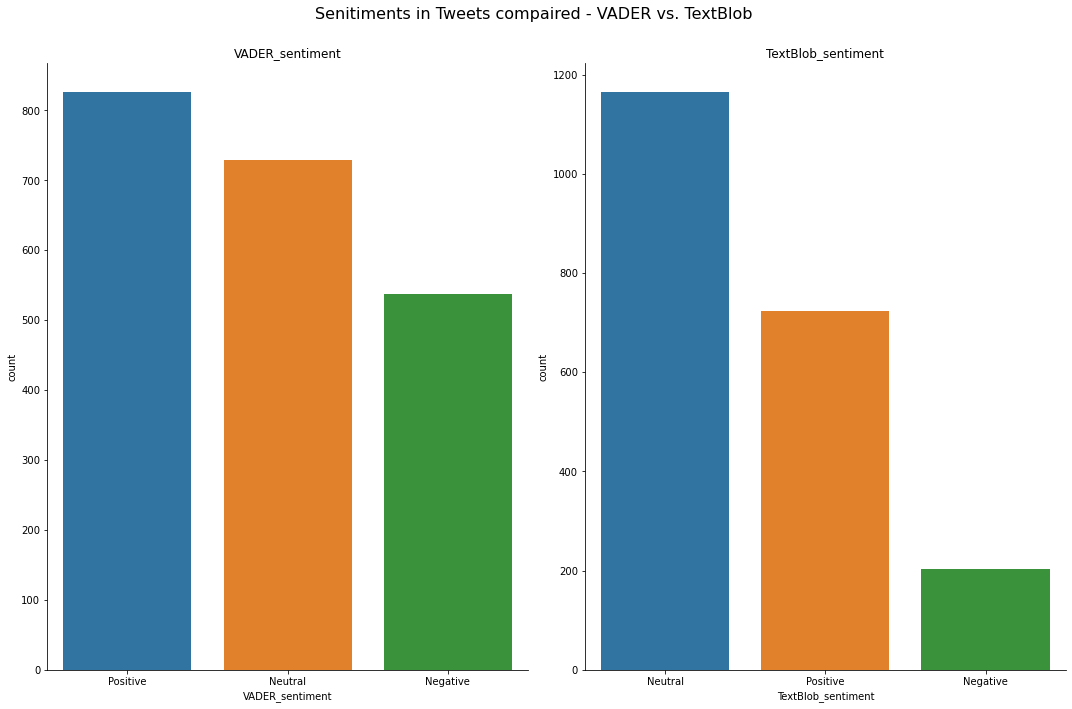

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.flatten()
for idx, column in enumerate(df.columns[-3:-1]):
    sns.countplot(ax=axes[idx], x=column, data=df, order=df[column].value_counts().index)
    axes[idx].set_title(column)
    sns.despine()
fig.suptitle('Senitiments in Tweets compaired - VADER vs. TextBlob \n', fontsize=16)
plt.tight_layout()
plt.show()

Below is a quick analysis on the scores to set the thresholds, especially for the neutral category

In [23]:
df[(df['VADER_compound'] > 0.10) & (df['VADER_compound'] < 0.15)]['Tweets']

26                                                                                                                                                                                                              Never missing an opportunity to play the vaxx card\n\n#Ukraine #Russia #Covid #Vaccine https://t.co/vS2oKsxAo9
41                                       Covid-19 News Story that Has Me Concerned about More than the Virus | by Justiss Goode | Jun, 2021 | Medium - via @pensignal  Read this story https://t.co/JE46gWTM8t about how one #teenager struggled to go against his parents wishes about getting the #covid #vaccine this year.
43                                                                            Anti-epidemic supplies provided by China were flown to Kiribati's capital Tarawa on Wednesday to help the South Pacific island country to cope with the COVID-19 pandemic. #Coronavirus #Vaccine https://t.co/eo7JwG5Mwe https://t.co/UX3kzNY5E2
47                                         

In [24]:
df[(df['TextBlob_polarity'] > 0.05) & (df['TextBlob_polarity'] < 0.1)]['Tweets']


9                                            Ahmedabad has at least 4195 new slots available between 25-02-22 &amp; 04-03-22.\n\nCovishield:\nDose1- 18+/45+:698/0\nDose2- 18+/45+:699/0\n\nCovaxin:\nDose1- 18+/45+:0/0\nDose2- 18+/45+:0/0\n\nBook one now at https://t.co/xbSrfOfqSe #vaccine #cowin #covid #Ahmedabad
19                                          South Delhi has at least 13690 new slots available between 25-02-22 &amp; 04-03-22.\n\nCovishield:\nDose1- 18+/45+:2856/0\nDose2- 18+/45+:2916/0\n\nCovaxin:\nDose1- 18+/45+:0/0\nDose2- 18+/45+:0/0\n\nBook one now at https://t.co/oN1Ae9XIlf #vaccine #cowin #covid #Delhi
60      We mustn't be distracted by what's happening in #Ukraine. A #feminist and #DIVERSE military is a strong military. The #draft must prioritize #BIPOC, #LGBT and #women just as we did with the #vaccine. Justice is non-negotiable.\n\n#Russia\n#DraftOurDaughters \n#StrongerTogether2022 https://t.co/3bks2TET9c
66                                                        

Below is an analysis to check, based on labels that were assigned as opposite by the 2 models, which ones are more close to reality.

In [25]:
df_filtered = df[(abs(df['TextBlob_polarity'] - df['VADER_compound']) > 0.2) & (df['VADER_sentiment'] != df['TextBlob_sentiment'])]

In [26]:
df_filtered[(df_filtered['VADER_sentiment'] != 'Neutral') & (df_filtered['TextBlob_sentiment'] != 'Neutral')]

,TimeStamps,Screen name,Username,Tweets,Tweets_corrected,lemmatized_tweets,VADER_compound,VADER_sentiment,TextBlob_sentiment,TextBlob_polarity
14,2022-02-25 04:15:09+00:00,mgyahoo1,mgyahoo,#plant - based #COVID\n#vaccine \n#VaccineSideEffects ?\nWhat happened to Glaxo solution in 2021?\n https://t.co/qSJVT2lrHd https://t.co/2CX2JfDyYj,plant based covid vaccine vaccinesideeffects what happened to glaxo solution in,plant base covid vaccine vaccinesideeffect what happen to glaxo solution in,0.3182,Positive,Negative,-0.800000
77,2022-02-24 23:41:01+00:00,J06N102017,"Julia, a Master Photographer",Russia ended Covid in one day. Impressive. No other news needed.\n#covid #russia #ukraine #war #RussiaUkraineWar #vaccine https://t.co/T8zihWrq6i,russia ended covid in one day impressive no other news needed covid russia ukraine war russiaukrainewar vaccine,russia end covid in one day impressive no other news need covid russia ukraine war russiaukrainewar vaccine,-0.4215,Negative,Positive,0.531250
94,2022-02-24 22:50:18+00:00,johnmgillis,Dr. John Gillis,"Anyone out there Triple Factsinated \nin Constitutional Law, Epidemiology, +Russian/Ukrainian Conflict Studies?\n\nIt takes real work to get the Social Media U triple! You don't just DO, you ARE your own research!\n\n#research\n#socialmedia \n#Constitution\n#Ukraine \n#vaccine \n#cdnpoli",anyone out there triple factsinated in constitutional law epidemiology russian ukrainian conflict studies it takes real work to get the social media u triple you do not just do you are your own research research socialmedia constitution ukraine vaccine cdnpoli,anyone out there triple factsinate in constitutional law epidemiology russian ukrainian conflict study it take real work to get the social medium u triple you do not just do you be your own research research socialmedia constitution ukraine vaccine cdnpoli,-0.3182,Negative,Positive,0.208333
102,2022-02-24 22:32:10+00:00,GPC_catharine,Catharine Rhodes,My cousin died from a #covid19 #vaccine at age 32. My great aunt died in a #nursinghome from #COVID What does this tell me? (A #thread) #onpoli #canada #canpoli #politics #mandates #VaccineSideEffects #VaccineMandate #VaccinesWork,my cousin died from a covid vaccine at age my great aunt died in a nursinghome from covid what does this tell me a thread onpoli canada canpoli politics mandates vaccinesideeffects vaccinemandate vaccineswork,my cousin die from a covid vaccine at age my great aunt die in a nursinghome from covid what do this tell I a thread onpoli canada canpoli politic mandate vaccinesideeffect vaccinemandate vaccineswork,-0.5719,Negative,Positive,0.800000
108,2022-02-24 22:16:49+00:00,epaultaylor,Paul Taylor,"Canada's 1st homegrown #COVID19 #vaccine has shown high efficacy against infection during Phase 3 clinical trials, the drugmakers behind the plant-based shot reported Tuesday, fuelling hopes it could soon get a stamp of approval for use. By @LaurenPelley https://t.co/ITsCp3fxWB",canada's st homegrown covid vaccine has shown high efficacy against infection during phase clinical trials the drugmakers behind the plant based shot reported tuesday fuelling hopes it could soon get a stamp of approval for use by,canada 's st homegrown covid vaccine have show high efficacy against infection during phase clinical trial the drugmaker behind the plant base shot report tuesday fuelling hope it could soon get a stamp of approval for use by,0.7184,Positive,Negative,-0.346667
...,...,...,...,...,...,...,...,...,...,...
2048,2022-02-21 15:20:00+00:00,GeneOnlineNews,GeneOnline,"@moderna_tx has unveiled 3 new #mRNA #vaccine programs. The vaccines will target HSV-2, the virus that causes #herpes, VZV, which causes #shingles and checkpoint antigens on #cancer cells.\n\nhttps://t.co/Df26PsjKsr",has unveiled new mrna vaccine programs the vaccines will target hsv the virus that causes herpes vzv which causes shingles and checkpoint antigens on cancer cells,have unveil new mrna vaccine program the vaccine will

It looks like Vader was a bit better in predicting sentiments.

We will export the lemmatized twees and the VADER sentiment labels to a *.csv* file.

## Export dataset with VADER sentiment

In [27]:
export_df = df.loc[:, ['lemmatized_tweets', 'VADER_sentiment']].reset_index(drop=True)

In [28]:
export_df.head()

,lemmatized_tweets,VADER_sentiment
0,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more,Neutral
1,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid,Negative
2,nstnation state health director dr othman warijo say the case involve a year old girl with a history of asthma who receive her vaccine at the sultanah bahiyah hospital kedah child vaccine covid pickid,Neutral
3,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn,Positive
4,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai,Positive


In [30]:
export_df.to_csv('tweets_processed.csv', index=False)